# **Projet 3** - Concevez_Une_Application_Au_Service_De_La_Sante_Publique

## Librairie

In [36]:
import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

## Importation des données

In [37]:
# Import the dataset MAC
# food = "/Users/remi/Documents/FoodFact/foodfact.csv"
# df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [38]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact.csv"
df_food = pd.read_csv(food, sep="\t", low_memory=False)

## Nettoyage du dataset

### Sélection des colonnes utiles

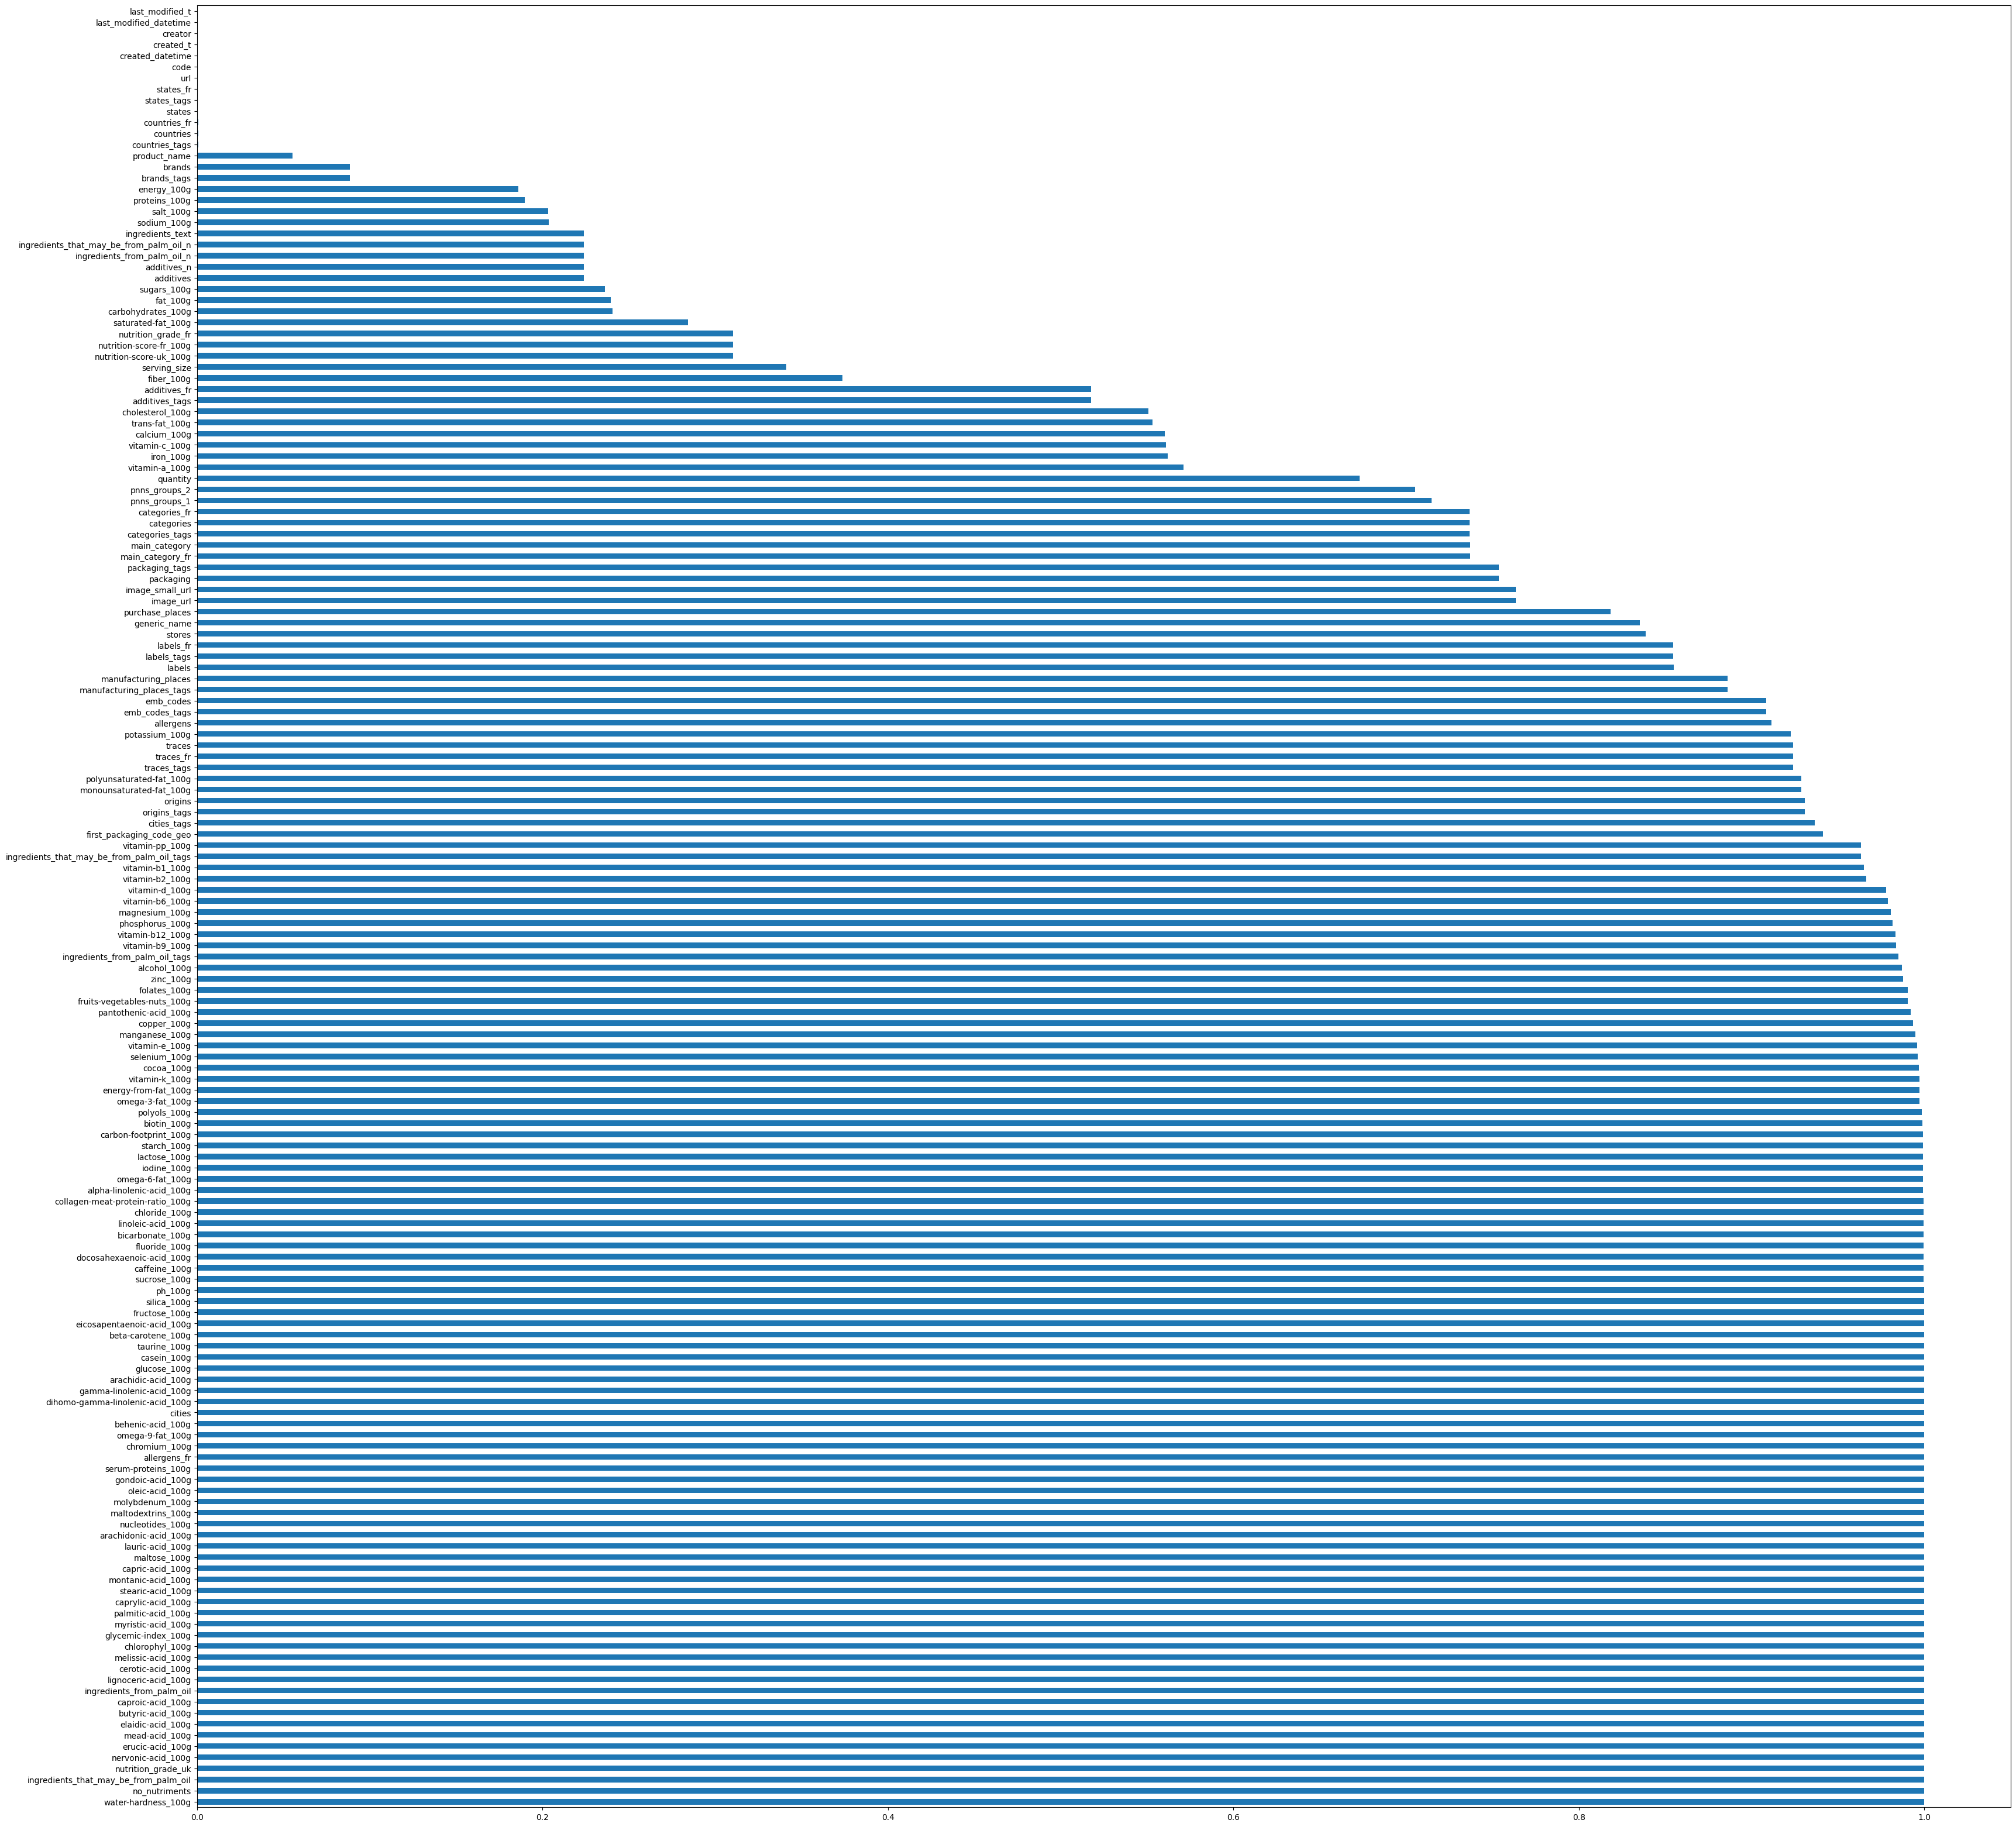

In [39]:
# Observation of zero values (average per column)
plt.figure(figsize=(40,40))
df_food.isna().mean().sort_values(ascending=False).plot.barh()
plt.show()

In [40]:
# Delete columns containing only null values
df_food.dropna(axis=1, how="all", inplace=True)

In [41]:
# Check columns containing < 80% null values and uncontaing "100g"
df_food.loc[:, (df_food.isna().mean() > 0.8) & (~df_food.columns.str.contains("100g"))].columns

Index(['generic_name', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr',
       'traces', 'traces_tags', 'traces_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags'],
      dtype='object')

In [42]:
# Check columns containing < 80% null values and containg "100g"
df_food.loc[:, (df_food.isna().mean() > 0.8) & (df_food.columns.str.contains("100g"))].columns

Index(['energy-from-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g',
       'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g',
       'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g',
       'montanic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'arachidonic-acid_100g', 'gamma-linolenic-acid_100g',
       'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g',
       'oleic-acid_100g', 'gondoic-acid_100g', 'sucrose_100g', 'glucose_100g',
       'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g',
       'starch_100g', 'polyols_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'alcohol_100g', 'beta-carotene_100g',
       'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 

In [43]:
# Check values on allergens column
df_food.loc[df_food["allergens"].notnull(),["code","allergens"]]

,code,allergens
184,0000007730009,"Blé, Beurre, Oeufs, Noisette"
218,0000020424640,"Vollmilchpulver, Vollmilchpulver, Soja, Butter..."
222,0000027533024,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea..."
223,0000027533048,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea..."
239,0000084154071,mostaza
...,...,...
320628,9556156046399,"soja, soja"
320648,9556417639339,blé
320652,9556587103869,blé
320701,96116845,"ORGE, CELERI"


In [44]:
# Check values on ingredients_from_palm_oil_tags column
df_food.loc[df_food["ingredients_from_palm_oil_tags"].notnull(),["code","ingredients_from_palm_oil_tags"]]

,code,ingredients_from_palm_oil_tags
509,00023092,huile-de-palme
1356,00099332,huile-de-palme
10372,0012009012168,huile-de-palme
11272,0014100096979,huile-de-palme
11273,0014100096986,huile-de-palme
...,...,...
320530,9555022300023,huile-de-palme
320531,9555022300030,huile-de-palme
320601,9556041610322,huile-de-palme
320648,9556417639339,huile-de-palme


In [45]:
# Check values on traces_fr column
df_food.loc[df_food["traces_fr"].notnull(),["code","traces_fr"]]

,code,traces_fr
47,0000000027083,"Œufs,Lait"
153,0000000050913,"Œufs,Gluten,Lait,Fruits à coque,Soja,Oatmeal,W..."
174,0000000290616,Contient-oeuf-lait-anchois-soya-ble-seigle-org...
180,0000001938067,"Soja,Anhydride sulfureux et sulfites,Contient-ble"
181,0000004302544,"Gluten,Peut-contenir-noix-varies-soya-lait-oeu..."
...,...,...
320591,9556041608411,"Poisson,Gluten,Mollusques,Soja"
320603,9556041611138,Soja
320604,9556041611978,Arachides
320652,9556587103869,"Œufs,Lait,Graines de sésame,Soja"


In [46]:
# Selection of columns potentially useful for analysis
columns_to_keep = ["allergens","traces_fr","ingredients_from_palm_oil_tags"]

In [47]:
# Selection of columns containing < 80% null values and columns_to_keep
df_food = df_food.loc[:, (df_food.isna().mean() < 0.8) | (df_food.columns.isin(columns_to_keep))]

In [48]:
# Describes data
df_food.shape

(320772, 57)

In [49]:
# Check columns
df_food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'allergens', 'traces_fr',
       'serving_size', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100

In [50]:
# Selection of columns to be deleted
columns_to_deleted = ["url","creator","created_t","created_datetime","last_modified_t","last_modified_datetime",
                      "packaging","packaging_tags","brands","brands_tags","categories","categories_tags","countries","countries_tags","serving_size",
                      "additives_n","additives","additives_tags","ingredients_from_palm_oil_tags","ingredients_that_may_be_from_palm_oil_n","states","states_tags","states_fr",
                      "main_category","image_url","image_small_url","nutrition-score-uk_100g"]

In [51]:
# Check the countries_tags column
df_food.loc[df_food["countries_tags"].notnull(),["countries_tags"]].drop_duplicates()

,countries_tags
0,en:france
1,en:united-states
47,en:united-kingdom
106,"en:france,en:united-states"
174,en:canada
...,...
320272,"en:australia,en:japan"
320385,en:maldives
320550,"en:australia,en:malaysia"
320633,"en:france,en:hong-kong"


In [52]:
# Select columns for analysis
df_food = df_food.drop(columns_to_deleted, axis=1)

### Sélection des produits francophone

<Axes: >

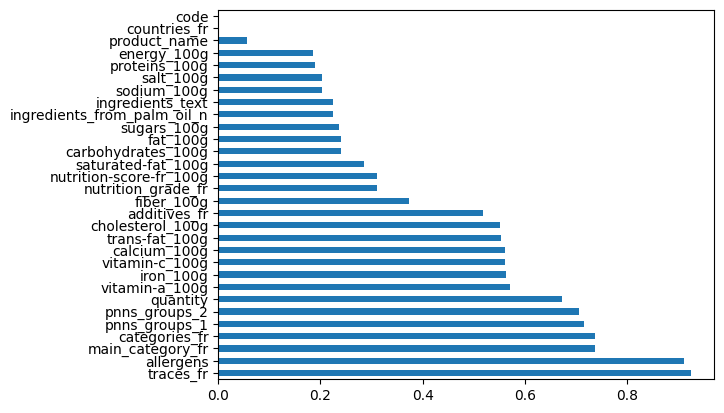

In [53]:
# Check for zero values for the final data set
df_food.isna().mean().sort_values(ascending=False).plot.barh()

In [54]:
# Replaces missing values with the empty string ("")
df_food["countries_fr"] = df_food["countries_fr"].fillna("")

In [55]:
# Check the countries_fr Saint-Martin
df_food.loc[df_food["countries_fr"].str.contains("Saint-Martin")]

,code,product_name,quantity,categories_fr,countries_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
201901,3228020160093,Lait Demi-Écrémé,1l,"Produits laitiers,Laits,Homogenized milks,Past...",Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253941,3760138824158,Épices caraïbes,NaN,NaN,Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320498,9501007301509,Penche KUBA,NaN,NaN,Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Instanciation of countries not french
other_countries = df_food.loc[~df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin"),["countries_fr"]].drop_duplicates()

In [57]:
# Check the all countries
other_countries["countries_fr"].unique()

array(['États-Unis', 'Royaume-Uni', 'Canada', 'Suisse', 'Espagne',
       'Allemagne', 'Slovénie', 'Italie', 'Roumanie', 'Australie',
       'Portugal', '', 'Royaume-Uni,États-Unis', 'Canada,États-Unis',
       'Pays-Bas', 'Irlande', 'Taiwan', 'Australie,Suisse', 'Brésil',
       'République dominicaine', 'États-Unis,en:Australie',
       'Arabie saoudite', 'Émirats arabes unis', 'Irak', 'Koweït',
       'Moldavie', 'Belgique', 'Singapour', 'Finlande',
       'Australie,États-Unis',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Panama', 'Costa Rica', 'Mexique', 'États-Unis,en:Pays-bas',
       'Espagne,Royaume-Uni,en:Scotland', 'Thaïlande', 'Chine',
       'Luxembourg', 'Liban', 'Suisse,États-Unis', 'Allemagne,États-Unis',
       'États-Unis,en:Deutschland', 'Belgique,Suisse,États-Unis',
       'Danemark,États-Unis,en:Spanien',
       'États-Unis,en:Belgie,en:Nederland', 'Belgique,Suisse',
       'Malaisie,États-Unis', 'Guyana,États-Unis', 'Serbie', 'Barba

In [58]:
# Data selection for French countries only
df_food_fr = df_food.loc[df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin")]

In [59]:
# Check the mean values per column
df_food_fr.isna().mean().sort_values(ascending=False)

trans-fat_100g                 0.996050
cholesterol_100g               0.995767
vitamin-a_100g                 0.994009
iron_100g                      0.987997
vitamin-c_100g                 0.986805
calcium_100g                   0.977126
traces_fr                      0.806108
allergens                      0.768555
additives_fr                   0.691335
fiber_100g                     0.537503
carbohydrates_100g             0.521894
fat_100g                       0.517479
ingredients_text               0.458213
ingredients_from_palm_oil_n    0.458213
nutrition-score-fr_100g        0.378670
nutrition_grade_fr             0.378670
main_category_fr               0.372265
categories_fr                  0.372265
saturated-fat_100g             0.368910
sugars_100g                    0.367455
sodium_100g                    0.366900
salt_100g                      0.366869
proteins_100g                  0.349037
energy_100g                    0.346239
pnns_groups_1                  0.342460


In [60]:
df_food_fr[df_food_fr["product_name"].isnull()]

,code,product_name,quantity,categories_fr,countries_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
48,0000000027205,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,NaN,NaN,Root-bier,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0000009336247,NaN,"46,7 g","Snacks sucrés,Confiseries,Bonbons",France,NaN,NaN,Œufs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,0000050157846,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,00003001,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320718,9688084817410,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320745,9800801107,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320746,9800895007,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,9800895250,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_food_fr = df_food_fr.dropna(subset="product_name")

## Analyse, nettoyage et préparation du dataset

### Selection des colonnes utiles pour la suite de l'analyse

In [62]:
df_food_fr.columns

Index(['code', 'product_name', 'quantity', 'categories_fr', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [63]:
columns_to_deleted = ["quantity","countries_fr","main_category_fr"]

In [64]:
df_food_fr[df_food_fr["quantity"].notnull()]["quantity"].unique()

array(['1kg', '2.46 kg', '1 kg ', ..., '1,25kg', '18,66kg', '67g'],
      dtype=object)

In [65]:
df_food_fr[df_food_fr["countries_fr"].notnull()]["countries_fr"]

0                    France
46                   France
106       France,États-Unis
136                  France
138       France,États-Unis
                ...        
320761               France
320763               France
320764               France
320765               France
320770               France
Name: countries_fr, Length: 91651, dtype: object

In [66]:
df_food_fr[df_food_fr["main_category_fr"].notnull()]["main_category_fr"].unique()

array(['Filet-de-boeuf', 'Aliments et boissons à base de végétaux',
       'Sablés', ..., 'en:Cremes-vegetales-a-base-de-coco-pour-cuisiner',
       'en:Malt-vinegar', 'Attieke'], dtype=object)

In [67]:
df_food_fr = df_food_fr.drop(columns=columns_to_deleted)

### pnns_groups 1 & 2 - Analyse et correction des erreurs

In [68]:
df_food_fr.columns

Index(['code', 'product_name', 'categories_fr', 'ingredients_text',
       'allergens', 'traces_fr', 'additives_fr', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [108]:
# Check the uniqus values 
df_food_fr["pnns_groups_1"].unique()

array([nan, 'Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces'],
      dtype=object)

In [96]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("unknown",np.nan)

In [99]:
df_food_fr[df_food_fr["pnns_groups_1"] == "cereals-and-potatoes"]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218764,3270160019151,Haricots beurre,"Aliments et boissons à base de végétaux,Alimen...",haricots beurre,NaN,NaN,NaN,0.0,NaN,cereals-and-potatoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218773,3270160046201,Maïs doux en épis,"Aliments et boissons à base de végétaux,Alimen...",maïs,NaN,NaN,NaN,0.0,a,cereals-and-potatoes,...,7.5,2.5,2.6,0.0,0.0,NaN,NaN,NaN,NaN,-3.0


In [100]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("cereals-and-potatoes","Cereals and potatoes")

In [103]:
df_food_fr[df_food_fr["pnns_groups_1"] == "fruits-and-vegetables"]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
182,0000005200016,lentilles vertes,"Aliments et boissons à base de végétaux,Alimen...",lentilles vertes,NaN,NaN,NaN,0.0,NaN,Cereals and potatoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12998,0016000275348,Lucky Charms,"Aliments et boissons à base de végétaux,Alimen...","Whole Grain Oats, Sugar, Oat Flour, Corn Syrup...",NaN,NaN,"E428 - Gélatine,E339iii - Phosphate de sodium ...",0.0,d,Cereals and potatoes,...,37.00,7.41,7.41,1.60,0.630000,0.000556,0.0222,0.3700,0.01670,14.0
14734,0018894360155,Macaroni N' Cheese,"Aliments et boissons à base de végétaux,Alimen...","ENRICHED MACARONI (_WHEAT_ FLOUR, NIACIN, IRON...","WHEAT, DAIRY, WHEAT, CHEESE, MILK, CHEESE, WHE...",NaN,"E375 - Acide nicotinique,E101 - Riboflavine,E3...",0.0,c,Cereals and potatoes,...,7.05,2.82,11.30,2.04,0.804000,0.000000,0.0000,0.0564,0.00254,9.0
21077,0024094070343,Fusilli no.34,"Aliments et boissons à base de végétaux,Alimen...","Durum (_wheat_) semolina, niacin, ferrous lact...",wheat,NaN,"E375 - Acide nicotinique,E585 - Lactate ferreu...",0.0,a,Cereals and potatoes,...,1.79,3.57,12.50,0.00,0.000000,0.000000,0.0000,0.0000,0.00321,-6.0
22521,00263290,Pain Soft White Farmhouse,"Aliments et boissons à base de végétaux,Alimen...",Farine de _blé_ contenant du _gluten_ (farine ...,"blé, gluten, blé, blé, gluten, soja","Œufs,Lait","E170 - Carbonate de calcium,E375 - Acide nicot...",1.0,a,Cereals and potatoes,...,3.40,3.50,9.20,0.75,0.295276,NaN,NaN,NaN,NaN,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320601,9556041610322,Nouilles instantanées,"Aliments et boissons à base de végétaux,Alimen...","Farine de _blé_, huile de palme, sel, sels min...",blé,NaN,"E500 - Carbonates de sodium,E501 - Carbonates ...",1.0,b,Cereals and potatoes,...,1.10,1.80,5.10,0.40,0.157480,NaN,NaN,NaN,NaN,1.0
320648,9556417639339,Mantou Sandwich,"Aliments et boissons à base de végétaux,Alimen...","Farine de _blé_ (55.35%), eau (26.6%), sucre, ...",blé,NaN,NaN,1.0,b,Cereals and potatoes,...,14.00,0.30,8.00,0.06,0.023622,NaN,NaN,NaN,NaN,2.0
320652,9556587103869,Mini Paratha,"Aliments et boissons à base de végétaux,Alimen...","Farine de _blé_ (52%), eau, huile de palme, su...",blé,"Œufs,Lait,Graines de sésame,Soja",E500 - Carbonates de sodium,1.0,c,Cereals and potatoes,...,5.10,6.50,6.00,0.90,0.354331,NaN,NaN,NaN,NaN,10.0
320671,959,3 petits pains multicéréales,"Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("fruits-and-vegetables","Fruits and vegetables")

In [106]:
df_food_fr[df_food_fr["pnns_groups_1"] == "sugary-snacks"]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
66153,00561112,Iced & Spiced Soft Bun,"Snacks sucrés,Viennoiseries,Brioches,Brioches ...",Farine de blé (contient _Gluten_) (avec Farine...,"Gluten, Gluten, Gluten","Œufs,Lait,Graines de sésame","E170 - Carbonate de calcium,E375 - Acide nicot...",1.0,c,sugary-snacks,...,36.0,2.2,4.9,0.33000,0.129921,NaN,NaN,NaN,NaN,9.0
112689,0201292018371,Pain chocolat (x 5),"Petit-déjeuners,Snacks sucrés,Viennoiseries,Pa...","Farine de blé, beurre 22%, lait demi-écrémé pa...",NaN,"Œufs,Fruits à coque,Derives-de-soja,Produits-l...",E322 - Lécithines,0.0,NaN,sugary-snacks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112764,0202446006565,Chouquette x10,"Snacks sucrés,Viennoiseries,Chouquettes","_Oeufs_ entiers, eau, farine de _blé_, _beurre...","Oeufs, blé, beurre",Fruits à coque,"E160a - Bêta-carotène,E450i - Pyrophosphate de...",0.0,NaN,sugary-snacks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112772,0202577010172,Croissants,"Snacks sucrés,Viennoiseries,Croissants","Croissant 96 % (farine de _blé_*, _beurre_* 22...","blé, beurre, oeufs, blé, oeufs",NaN,E300 - Acide ascorbique,0.0,d,sugary-snacks,...,7.2,2.2,7.5,1.08000,0.425197,NaN,NaN,NaN,NaN,17.0
112773,0202581010823,Pains au chocolat,"Snacks sucrés,Viennoiseries,Pains au chocolat",NaN,NaN,NaN,NaN,NaN,d,sugary-snacks,...,11.0,2.8,8.4,0.90000,0.354331,NaN,NaN,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311667,8480017081896,Pains au chocolat (x 10) 450 g - Dia,"Petit-déjeuners,Snacks sucrés,Viennoiseries,Pa...","farine de _blé_, huiles végétales (palme, colz...","blé, soja, beurre, gluten, blé, lait",Œufs,"E322 - Lécithines,E471 - Mono- et diglycérides...",1.0,e,sugary-snacks,...,19.2,NaN,6.3,1.25984,0.496000,NaN,NaN,NaN,NaN,24.0
311668,8480017081902,Croissants (x 10) 400 g - Dia,"Petit-déjeuners,Snacks sucrés,Viennoiseries,Cr...","Farine de blé, huiles végétales (palme, colza)...",NaN,Œufs,E471 - Mono- et diglycérides d'acides gras ali...,1.0,e,sugary-snacks,...,7.3,NaN,6.2,1.30048,0.512000,NaN,NaN,NaN,NaN,21.0
311916,8480017311498,Brioche tranchée pur beurre,"Snacks sucrés,Viennoiseries,Brioches,Brioches ...","Farine de _blé_, sucre, _oeufs_ entiers liquid...","blé, oeufs, beurre, beurre, gluten, blé",Fruits à coque,E471 - Mono- et diglycérides d'acides gras ali...,0.0,d,sugary-snacks,...,14.0,NaN,7.6,0.84000,0.330709,NaN,NaN,NaN,NaN,16.0
318568,91260369,Gâche,"Snacks sucrés,Viennoiseries,Brioches","Farine de blé, œufs frais, sucre, beurre* 12,7...",NaN,Soja,NaN,0.0,e,sugary-snacks,...,16.2,NaN,8.9,0.91000,0.358268,NaN,NaN,NaN,NaN,20.0


In [107]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("sugary-snacks","Sugary snacks")

In [109]:
df_food_fr[df_food_fr["pnns_groups_1"].isnull()]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,NaN,"Milk chocolate coating (evaporated cane juice,...",NaN,NaN,E322 - Lécithines,0.0,e,NaN,...,57.50,2.5,2.50,0.09652,0.03800,NaN,NaN,0.1,0.00090,22.0
136,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,Pack de 2 Twix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,0.00075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320757,9900000000233,Amandes,NaN,NaN,NaN,NaN,NaN,NaN,b,NaN,...,3.89,12.2,21.22,0.10000,0.03937,NaN,NaN,NaN,NaN,0.0
320760,99044169,Poireaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,Roussette du Bugey (2011),"Boissons,Boissons alcoolisées,Vins,Vins frança...",NaN,NaN,Anhydride sulfureux et sulfites,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Check the unique values
df_food_fr["pnns_groups_2"].unique()

array([nan, 'Legumes', 'Biscuits and cakes', 'Non-sugared beverages',
       'Sweetened beverages', 'Meat', 'One-dish meals', 'Soups',
       'Chocolate products', 'Cheese', 'Sweets', 'Sandwich', 'Appetizers',
       'Dressings and sauces', 'Dried fruits', 'Nuts',
       'Breakfast cereals', 'Pizza pies and quiche', 'Fruits',
       'Fruit juices', 'Fats', 'Alcoholic beverages', 'Cereals',
       'Vegetables', 'Bread', 'Processed meat', 'Ice cream',
       'Fish and seafood', 'pastries', 'Milk and yogurt',
       'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Eggs',
       'Potatoes', 'Salty and fatty products'], dtype=object)

In [84]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("fruits", "Fruits")

In [74]:
df_food_fr[df_food_fr["pnns_groups_2"] == "legumes"]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218764,3270160019151,Haricots beurre,"Aliments et boissons à base de végétaux,Alimen...",haricots beurre,NaN,NaN,NaN,0.0,NaN,cereals-and-potatoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("legumes", "Legumes")

In [81]:
df_food_fr[df_food_fr["pnns_groups_2"] == "vegetables"]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
54668,0042272006304,Velouté de champignons,"Aliments et boissons à base de végétaux,Alimen...","Eau, champignons 30%, légumes 12% (oignons, po...","crème, beurre, céleri",NaN,NaN,0.0,c,fruits-and-vegetables,...,0.5,0.5,1.0,0.7620,0.300000,NaN,NaN,NaN,NaN,4.0
66705,00595837,Champignons de Paris émincés épais,"Aliments et boissons à base de végétaux,Alimen...","Champignons, eau, sel, acidifiant : acide citr...",NaN,NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,...,0.0,2.1,2.2,0.7000,0.275591,NaN,NaN,NaN,NaN,0.0
175463,2000000005976,Mélange Persil/Ail coupé surgelé prêt à l'empl...,"Aliments et boissons à base de végétaux,Alimen...",Persil et ail en proportion variable.,NaN,NaN,NaN,0.0,a,fruits-and-vegetables,...,9.3,3.2,4.4,0.0508,0.020000,NaN,NaN,NaN,NaN,-9.0
175886,2000000021526,Champignons de Paris Pieds & Morceaux,"Aliments et boissons à base de végétaux,Alimen...","Champignons de Paris, eau, sel, acidifiant : a...",NaN,NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,...,0.5,NaN,1.9,0.5500,0.216535,NaN,NaN,NaN,NaN,1.0
176961,20004088,"Champignons I. Wahl, ganze Köpfe","Aliments et boissons à base de végétaux,Alimen...","Champignons, Wasser, Speisesalz, Säuerungsmitt...",NaN,NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,...,0.1,NaN,2.3,0.7000,0.275591,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313349,8710438089998,Mini Smile' Up,"Aliments et boissons à base de végétaux,Alimen...","Pommes de terre, pommes de terre déshydratées,...",NaN,"Œufs,Gluten,Lait",E464 - Hydroxypropylméthylcellulose,0.0,a,fruits-and-vegetables,...,0.5,3.9,3.3,0.5000,0.196850,NaN,NaN,NaN,NaN,-8.0
313357,8710438097979,Potatoes à Rôtir - Ail et persil,"Aliments et boissons à base de végétaux,Alimen...","Pommes de terre (90,5%), enrobage (5%) : farin...","blé, blé",NaN,NaN,0.0,a,fruits-and-vegetables,...,0.5,3.0,2.5,0.5000,0.196850,NaN,NaN,NaN,NaN,-7.0
313542,8710609310326,Champignons de Paris,"Aliments et boissons à base de végétaux,Alimen...","Champignons, eau, sel, acidifiant : acide citr...",NaN,NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,NaN,fruits-and-vegetables,...,NaN,NaN,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314818,8713021211110,Champignons Blancs de Paris,"Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,NaN,NaN,NaN,NaN,fruits-and-vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("vegetables", "Vegetables")

In [88]:
df_food_fr[df_food_fr["pnns_groups_2"] == "cereals"]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218773,3270160046201,Maïs doux en épis,"Aliments et boissons à base de végétaux,Alimen...",maïs,NaN,NaN,NaN,0.0,a,cereals-and-potatoes,...,7.5,2.5,2.6,0.0,0.0,NaN,NaN,NaN,NaN,-3.0


In [89]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("cereals", "Cereals")

In [93]:
df_food_fr[df_food_fr["pnns_groups_2"] == "unknown"]

,code,product_name,categories_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
46,0000000024600,Filet de bœuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,NaN,"Milk chocolate coating (evaporated cane juice,...",NaN,NaN,E322 - Lécithines,0.0,e,unknown,...,57.5,2.5,2.50,0.09652,0.038000,NaN,NaN,0.1,0.00090,22.0
136,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,Pack de 2 Twix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,0.00075,NaN
189,0000010127735,Sirops pour ganache macarons,"Sirops,Sirops-pour-ganache","Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,NaN,"E330 - Acide citrique,E171 - Oxyde de titane,E...",0.0,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320670,9588400178181,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,c,unknown,...,68.0,6.4,5.70,0.06000,0.023622,NaN,NaN,NaN,NaN,10.0
320685,96083291,Malt vinegar,en:Malt-vinegar,"Barley malt vinegar, barley malt extract",NaN,NaN,NaN,0.0,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320696,96095065,OBF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320736,9780201379129,Attiéké,"Attieke,Manioc,Semoules-de-manioc",semoule de manioc,NaN,NaN,NaN,0.0,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("unknown",np.nan)

### Huile de palme - Traitement des données

In [113]:
df_food_fr["ingredients_from_palm_oil_n"].unique()

array([nan,  0.,  1.,  2.])

In [34]:
df_food_fr[df_food_fr["nutrition-score-fr_100g"].notnull()]["nutrition-score-fr_100g"].unique()

array([ 22.,  14.,  13.,  15.,  12.,   6.,  26.,  18.,  20.,  -2.,   1.,
        11.,  19.,   4.,   2.,   7.,  17.,   5.,  -4.,  25.,   0.,  23.,
         3.,  -3.,  16.,   9.,  24.,  21.,   8.,  -1.,  10.,  -5.,  -6.,
        29.,  35.,  27.,  28.,  -7.,  -9.,  36.,  32., -10.,  30.,  -8.,
        33.,  40., -11.,  31., -12.,  34., -13., -14., -15.])

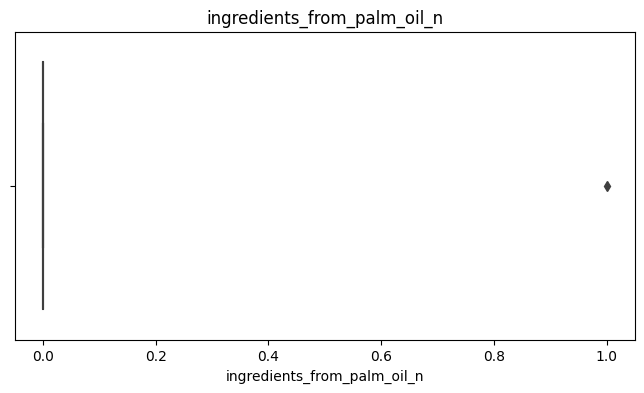

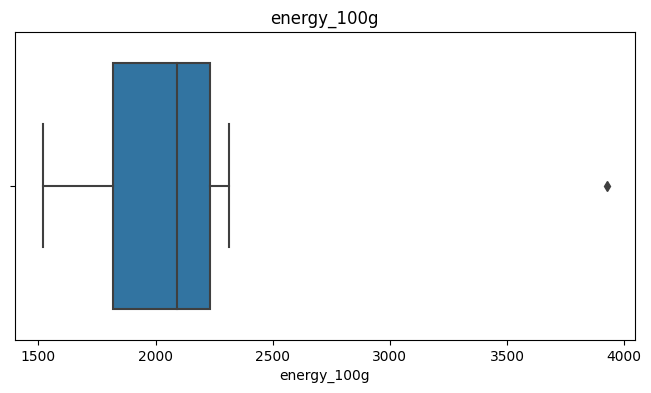

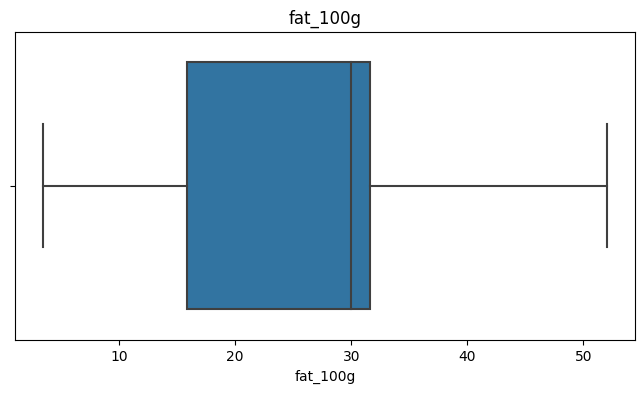

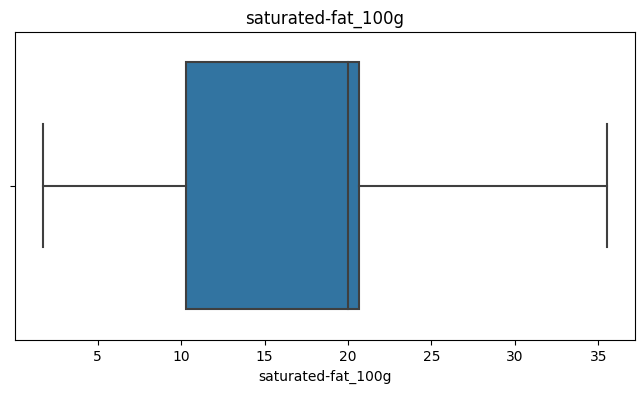

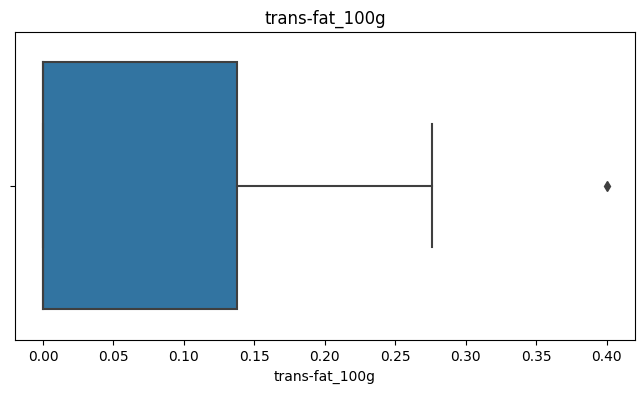

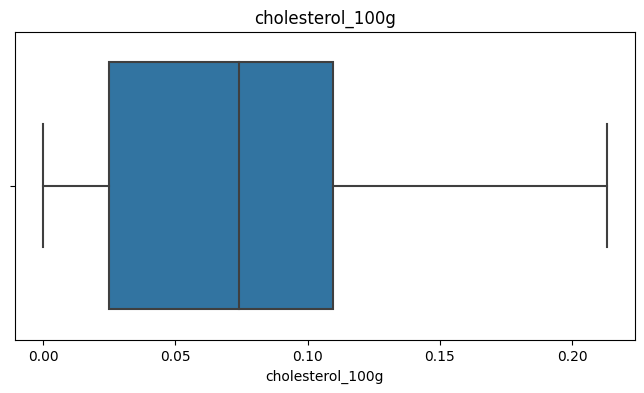

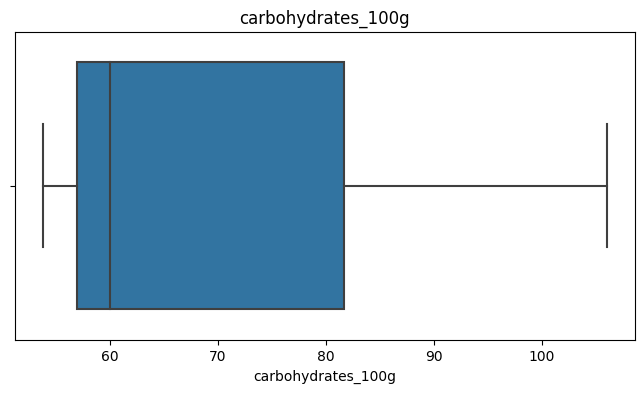

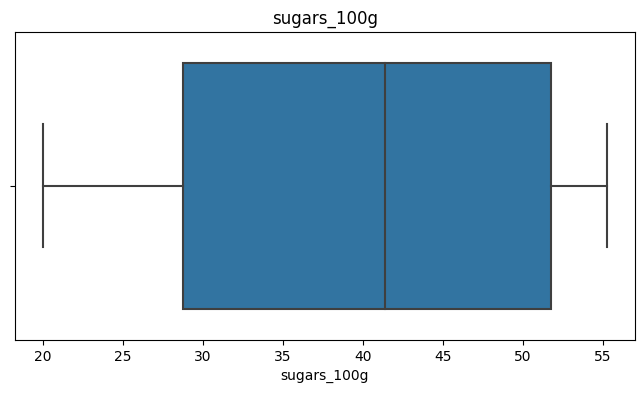

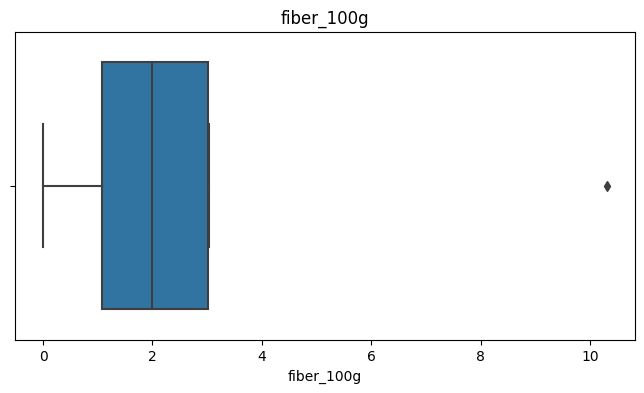

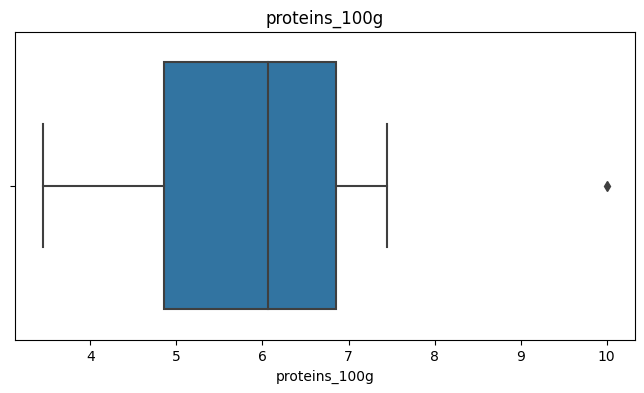

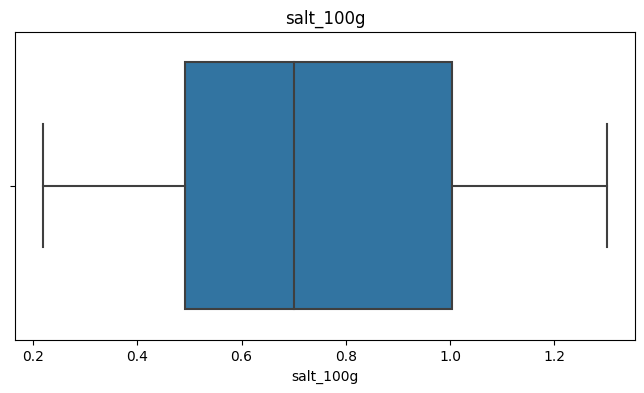

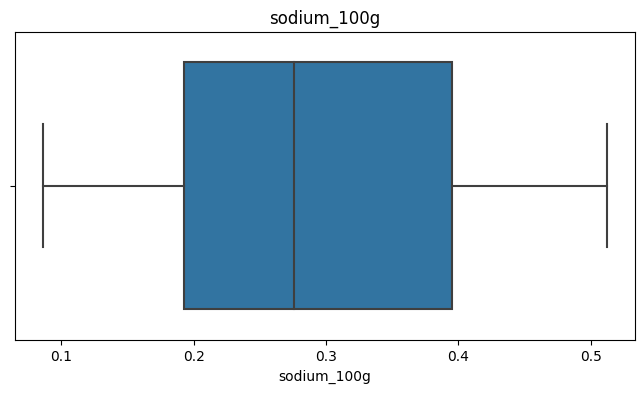

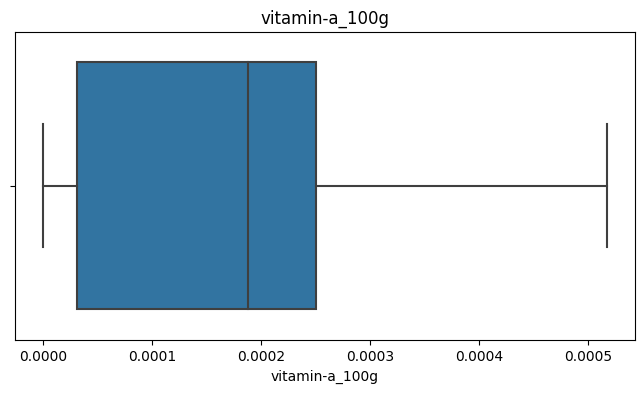

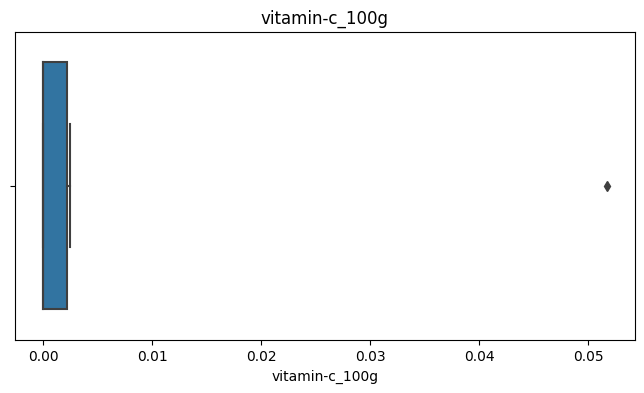

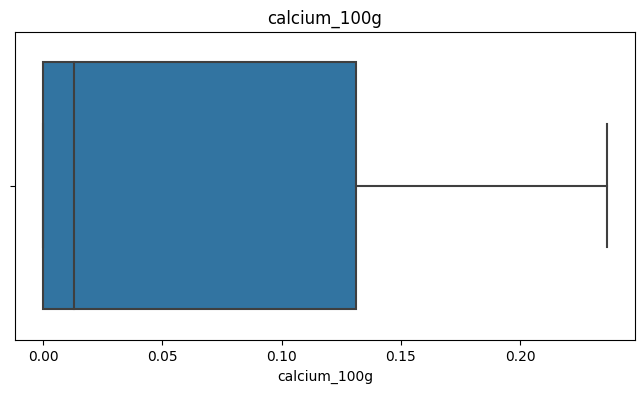

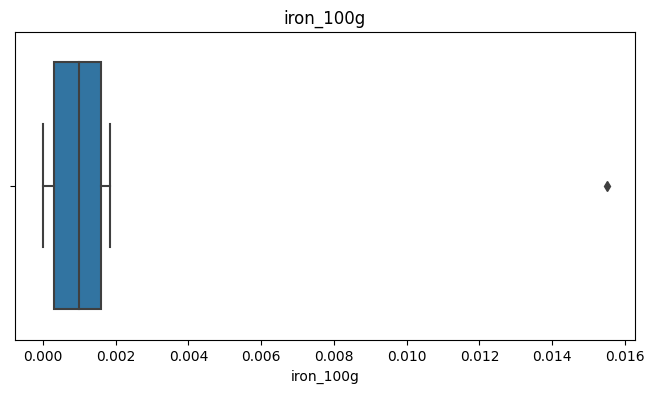

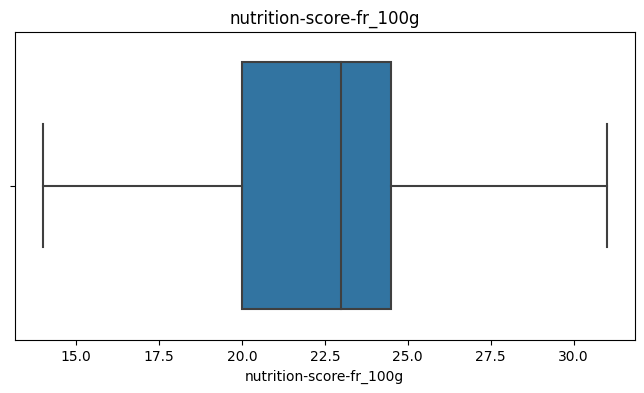

In [37]:
for col in df_food_fr.columns:
    if df_food_fr[col].dtype == "float":
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df_food_fr.dropna(), x=col, y=None)
        plt.title(col)
        plt.show()
    else:
        continue

In [38]:
# Check the values upper 0 fortrans fat column
# df_food_fr.loc[(df_food_fr["trans-fat_100g"].notnull()) & (df_food_fr["trans-fat_100g"] > 0),["code","product_name","trans-fat_100g"]].head(60)

In [39]:
outliers1 = df_food_fr.dropna(subset=['ingredients_from_palm_oil_n'])['ingredients_from_palm_oil_n'].unique()
outliers1

array([0., 1., 2.])

In [40]:
df_food_fr.columns

Index(['code', 'product_name', 'categories_fr', 'ingredients_text',
       'allergens', 'traces_fr', 'additives_fr', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

### Outliers - energy100g

<Axes: xlabel='sodium_100g', ylabel='salt_100g'>

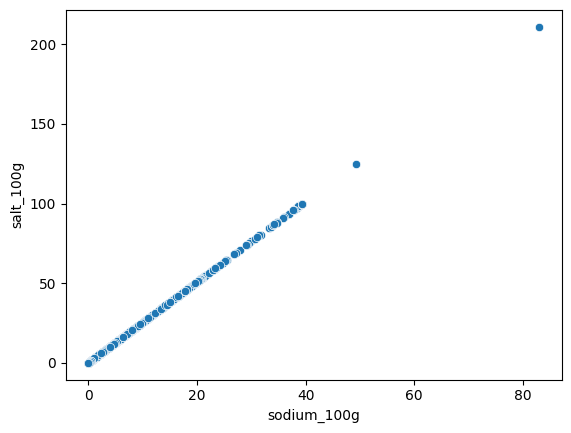

In [41]:
sns.scatterplot(data=df_food_fr, y='salt_100g', x="sodium_100g")

<Axes: xlabel='sodium_100g', ylabel='salt_100g'>

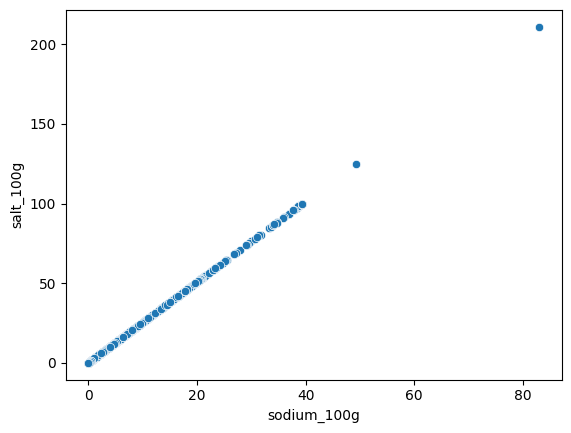

In [42]:
sns.scatterplot(data=df_food_fr, y='salt_100g', x="sodium_100g")

<Axes: xlabel='fat_100g', ylabel='saturated-fat_100g'>

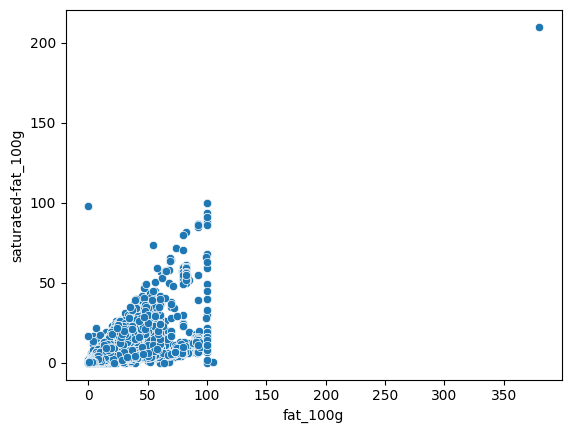

In [43]:
sns.scatterplot(data=df_food_fr, y="saturated-fat_100g", x="fat_100g")

<Axes: xlabel='carbohydrates_100g', ylabel='sugars_100g'>

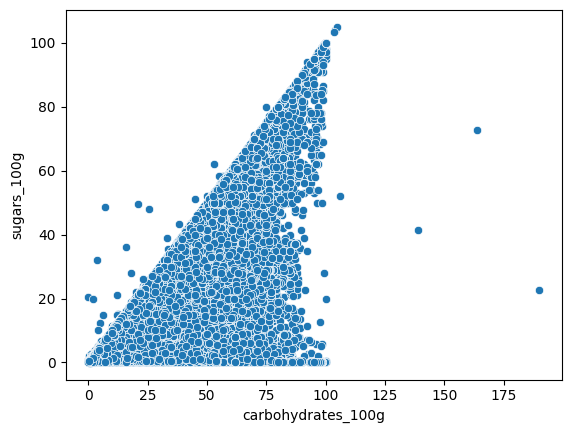

In [44]:
sns.scatterplot(data=df_food_fr, x="carbohydrates_100g", y="sugars_100g")

In [45]:
df_food_fr[df_food_fr["energy_100g"] > 3800][["product_name","energy_100g"]]

,product_name,energy_100g
56561,Tawny' Orange,5054.0
161426,Huile d'avocat,3883.0
178567,Confiserie Firenze Apfel Streuselkuchen Tiefge...,4197.0
178787,Halva with Almonds,9983.0
179179,Lot De 4 Baguettes,4184.0
...,...,...
304297,Gnocchi E Pasta Fresca,4828.0
305223,Miel D'eucalyptus,5749.0
313852,Cornetto Mini X8 Fruit,5644.0
319695,Miel,5925.0


In [46]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["energy_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["energy_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["energy_100g"])[(pd.Series(df_food_fr["energy_100g"]) < borne_inf) | (pd.Series(df_food_fr["energy_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

df_valeurs_aberrantes.sort_values(by="Valeurs aberrantes", ascending=False)

,Valeurs aberrantes
212928,3251373.0
249101,182764.0
245311,18700.0
223318,15481.0
178787,9983.0
...,...
217959,3502.0
206887,3502.0
174965,3494.0
178384,3489.0


In [47]:
borne_sup

3479.5

In [48]:
df_food_fr[df_food_fr["energy_100g"] > borne_sup][["product_name","energy_100g"]].sort_values(by="energy_100g", ascending=False)

,product_name,energy_100g
212928,Pois cassés,3251373.0
249101,"Légume Noisettes Carottes, 500 Grammes, Marque...",182764.0
245311,mini choux goût fromage de chèvre - poivre,18700.0
223318,Huiles vierge biologique de Colza - première p...,15481.0
178787,Halva with Almonds,9983.0
...,...,...
217959,Huile Vierge De Lin,3502.0
206887,Maxi Gourmande Royale,3502.0
174965,"Sill Matjes, Matjesfilets Geschnitten",3494.0
178384,Bio Leinöl nativ kaltgestellt,3489.0


## Outliers - Trans-fat

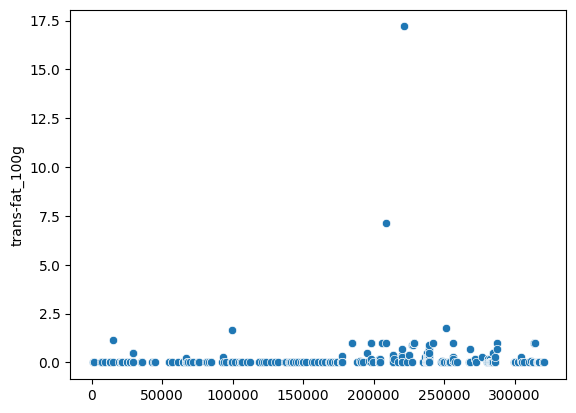

In [49]:
sns.scatterplot(df_food_fr["trans-fat_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [50]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["trans-fat_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["trans-fat_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["trans-fat_100g"])[(pd.Series(df_food_fr["trans-fat_100g"]) < borne_inf) | (pd.Series(df_food_fr["trans-fat_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
15163                 1.16
29122                 0.50
29130                 0.50
99796                 1.67
184441                1.00
184452                1.00
195574                0.50
197885                1.00
197889                1.00
197891                1.00
205931                1.00
208578                7.14
208739                1.00
220084                0.70
221641               17.20
227183                0.90
227633                0.90
228574                1.00
228580                1.00
228581                1.00
228588                1.00
228589                1.00
228590                1.00
228598                1.00
228614                1.00
228626                1.00
237640                0.50
237946                0.50
239106                0.50
239218                0.70
239434                0.90
239644                0.50
241990                1.00
251313                1.78
256227                1.00
268206                0.67
2

## Outliers - fiber_100g

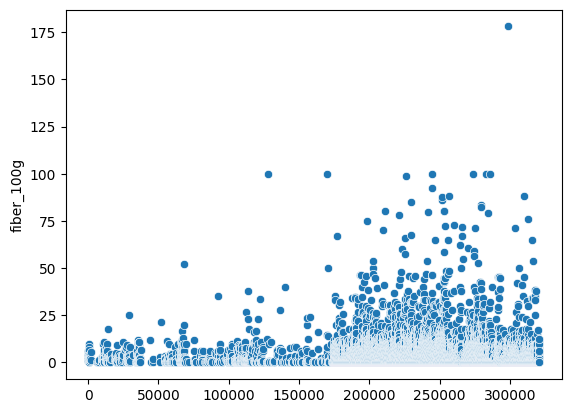

In [51]:
sns.scatterplot(df_food_fr["fiber_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [52]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["fiber_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["fiber_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["fiber_100g"])[(pd.Series(df_food_fr["fiber_100g"]) < borne_inf) | (pd.Series(df_food_fr["fiber_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
495                   10.0
597                    8.3
10375                  9.9
11179                 11.0
13424                  9.7
...                    ...
320532                10.5
320534                11.8
320535                10.6
320741                10.0
320757                12.2

[2913 rows x 1 columns]


## Outliers - proteins_100g

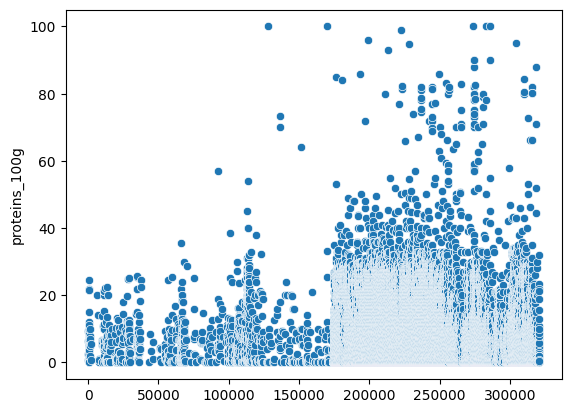

In [53]:
sns.scatterplot(df_food_fr["proteins_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [54]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["proteins_100g"])[(pd.Series(df_food_fr["proteins_100g"]) < borne_inf) | (pd.Series(df_food_fr["proteins_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
28476                 24.9
29113                 25.0
34626                 25.3
34632                 25.6
59306                 25.3
...                    ...
318230                70.9
318627                88.0
319192                28.2
319193                30.0
320309                32.0

[2545 rows x 1 columns]


In [55]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["vitamin-c_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["vitamin-c_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["vitamin-c_100g"])[(pd.Series(df_food_fr["vitamin-c_100g"]) < borne_inf) | (pd.Series(df_food_fr["vitamin-c_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
13161               0.0745
161015              7.5000
161016              3.0000
174641              0.1000
176140              0.1500
...                    ...
292548              0.0650
295141              0.0800
301304              0.0680
306601              0.0930
320556              0.0850

[140 rows x 1 columns]


### Outliers - Vitamines

In [56]:
'''plt.figure(figsize=(50,50))
sns.pairplot(df_food_fr)'''

'plt.figure(figsize=(50,50))\nsns.pairplot(df_food_fr)'

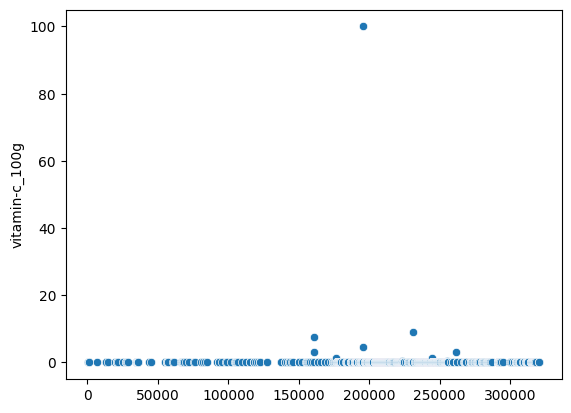

In [57]:
sns.scatterplot(df_food_fr["vitamin-c_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [58]:
df_food_fr[df_food_fr["vitamin-c_100g"] > 80][["product_name","vitamin-c_100g"]]

,product_name,vitamin-c_100g
195747,Juvamine Vitamine C500 à croquer sans sucres,100.0


In [59]:
df_food_fr[df_food_fr["vitamin-c_100g"] < 80][["product_name","vitamin-c_100g"]].sort_values("vitamin-c_100g",ascending=False)

,product_name,vitamin-c_100g
231048,Centrum Men,9.02
161015,"Coconut Liquid Water Enhancer, Original",7.50
195726,Junior Vitamine C & Calcium goût Fraise à croquer,4.71
261524,CitroBiotic,3.00
161016,Liquid Water Enhancer,3.00
...,...,...
150141,"4 petits carrés a 3 étages au beurre, pointe d...",0.00
155124,Sirop d'érable pur,0.00
60623,S.Pellegrino,0.00
156398,Vivaloé Honeydew Aloe,0.00


In [60]:
df_food_fr["vitamin-c_100g"].dtypes

dtype('float64')

### Outliers - Iron

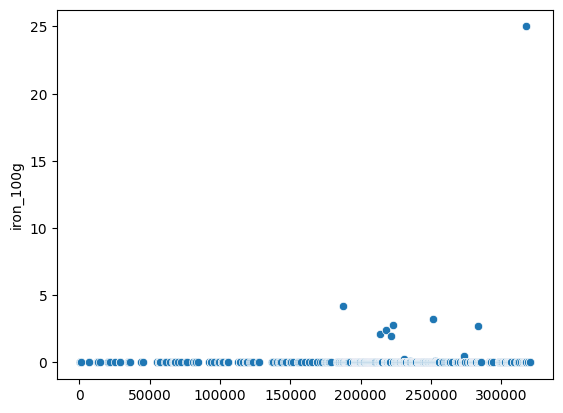

In [61]:
sns.scatterplot(df_food_fr["iron_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

## Remplacement des valeurs null

In [71]:
df_food_fr["main_category_fr"].unique()

KeyError: 'main_category_fr'